In [2]:
import numpy as np
import struct
import os

In [3]:
# create list of devices and their signal identifiers (ZFC id M_zfc)
# device_list = ["32C793E", "32C79BE", "32C7981", "32B1708", "32B1728", "32C7920", "32C79F7", "32C79C6"]
# device_list = ["32C79F7"]
# M_list = [31, 73, 109, 97, 173, 211, 139, 229]
M_list = [31]

In [4]:
file_path = "./storage/cent_test.dat_1.dat"
sample_size = 8
try:
    with open(file_path, 'rb') as f:
        # Read the binary data
        binary_data = f.read()
except:
    print("File %s not found!"%file_path)

num_samples = len(binary_data) // sample_size
samples = []
for i in range(num_samples):
    # Extract real and imaginary parts from the binary data
    real_part, imag_part = struct.unpack('ff', binary_data[i * sample_size: (i + 1) * sample_size])
    # Create a complex number and append it to the list of samples
    samples.append(complex(real_part, imag_part))

samples = np.array(samples)
print(samples.size)

5140


In [5]:
N = 257

zfc_seq_list = [np.array([np.exp(-1j * np.pi * M * n * (n + 1) / N) for n in range(N)]) for M in M_list]

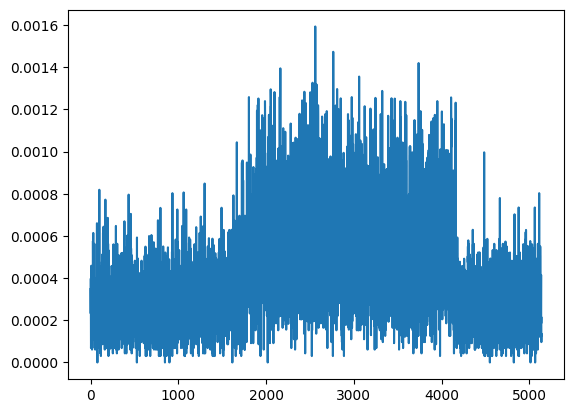

In [6]:
from matplotlib import pyplot as plt
plt.plot(np.abs(samples))

1931


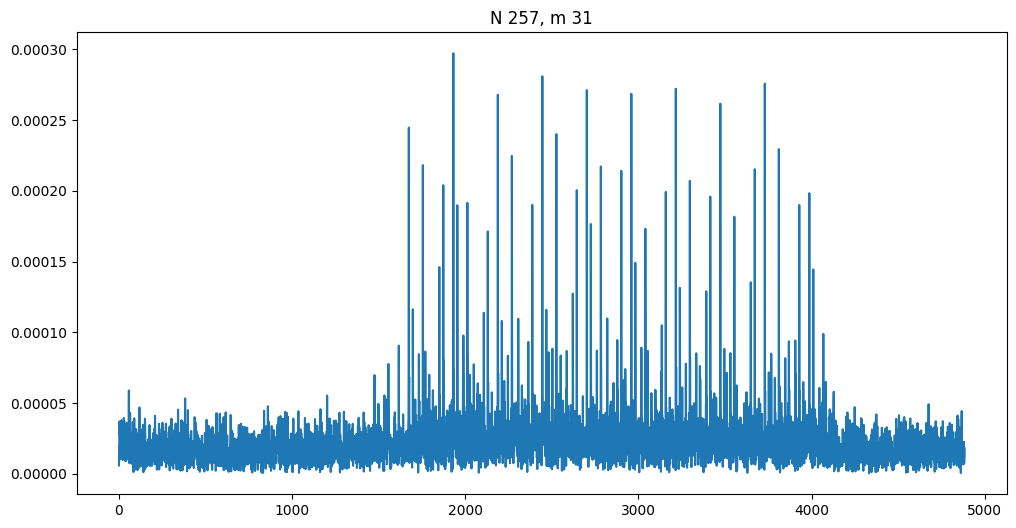

In [7]:
corr_zfc_list = np.array([np.correlate(samples, zfc_seq, mode='valid') / N for zfc_seq in zfc_seq_list])
plot_data_list = [np.abs(corr_zfc) for corr_zfc in corr_zfc_list]

fig, ax = plt.subplots(1, 1, figsize=[12,6])
axs = ax

axs.plot(plot_data_list[0])
axs.set_title("N %d, m %d" %(N, M_list[0]))

print(np.argmax(plot_data_list[0]))

# print(np.diff(np.argwhere(plot_data > 60.0).squeeze()))
# print(plot_data[np.argwhere(plot_data > 60.0).squeeze()])


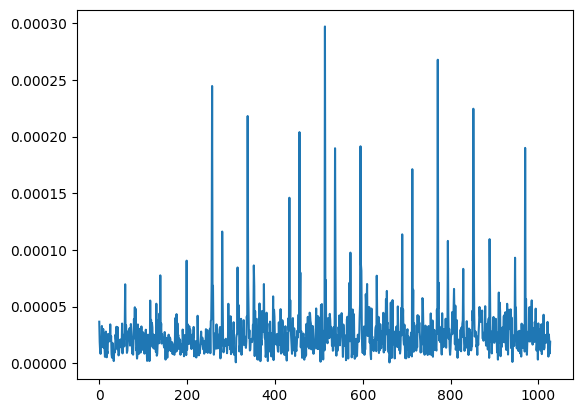

In [9]:
pmax = np.argmax(plot_data_list[0]).item()
plt.plot(plot_data_list[0][pmax-2*N : pmax + 2*N])

0.0009241494809730415
0.0010936912259258108
0.0006195398482827072
0.0005704231126391814


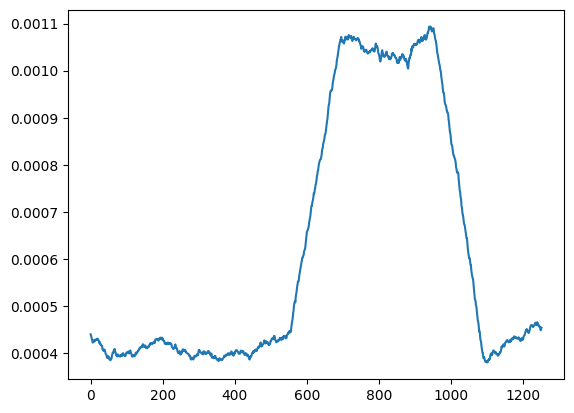

In [14]:
# floating window - to find the threshold
window_len = N
print(np.max(plot_data_list[0]))
relevant_signal = np.abs(samples[pmax-5*N : pmax + 5*N])
ma_signal = np.zeros((relevant_signal.size - N + 1), dtype=float)
for i in range(ma_signal.size):
    for j in range(N):
        ma_signal[i] += relevant_signal[i + j]
    ma_signal[i] /= N
plt.plot(ma_signal)
print(np.max(ma_signal))
pp = np.argmax(ma_signal).squeeze()
print(np.mean(ma_signal))
print(np.mean(np.delete(ma_signal, np.arange(pp - N//2 - 1, pp + N//2 + 1))))
# plt.yscale("log")